<a href="https://colab.research.google.com/github/bipinKrishnan/ML_from_scratch/blob/master/linear_reg_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import torch
import matplotlib.pyplot as plt
from random import shuffle

In [211]:
torch.manual_seed(2)

def create_data(weights, bias, shape=(1000, 2), mean=0, std=1):
  data = torch.normal(mean, std, shape)
  labels = data@weights + bias + torch.normal(0, 0.01, (bias.shape))

  return data, labels.reshape(-1, 1)

weights = torch.tensor([2.4, -2])
bias = torch.tensor([4])
data, labels = create_data(weights, bias)

In [ ]:
data.shape, labels.shape

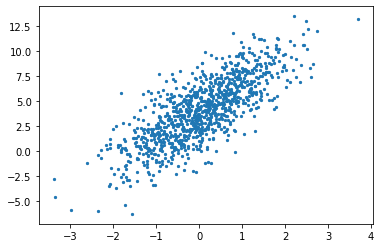

In [44]:
plt.scatter(data[:, 0], labels, 5)

In [208]:
def data_iter(data, labels, batch_size):
  indices = list(range(len(data)))
  shuffle(indices)

  for i in range(0, len(data), batch_size):
    idx = indices[i: min(i+batch_size, len(data))]

    yield data[idx], labels[idx]

In [128]:
generator = data_iter(data, labels, 4)

In [ ]:
print(data[:5], labels[:5])

In [ ]:
for data, labels in generator:
  print(data, labels)
  break

In [209]:
model_w = torch.zeros((2, 1), requires_grad=True)
model_b = torch.zeros(1, requires_grad=True)

def linear_reg(data, weights, bias):
  return data@weights + bias

def mse(y_pred, y_true):
  return ((y_pred.reshape(y_true.shape)-y_true)**2)/2

def SGD(params, lr, batch_size):
  for param in params:
    param.data.sub_(lr*param.grad/batch_size)
    param.grad.zero_()
 

In [210]:
epochs = 100
lr = 0.01

for epoch in range(epochs):
  for data, labels in data_iter(data, labels, 4):
    out = linear_reg(data, model_w, model_b)
    loss = mse(out, labels)
    loss.sum().backward()

    SGD([model_w, model_b], lr, 4)

 # print("Epoch: {}/{}  loss: {}  model_w: {}  model_b: {}\n".format(epoch, epochs, loss.sum(), model_w, model_b))

In [215]:
pred_line = data@model_w + model_b

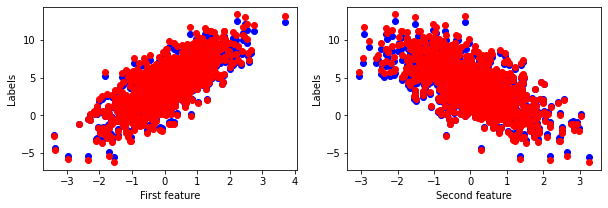

In [259]:
plt.figure(figsize=(10, 3))

plt.subplot(1, 2, 1)
plt.scatter(data[:, 0], pred_line.detach().numpy(), c='blue')
plt.scatter(data[:, 0], labels, c='red')
plt.xlabel("First feature")
plt.ylabel("Labels")

plt.subplot(1, 2, 2)
plt.scatter(data[:, 1], pred_line.detach().numpy(), c='blue')
plt.scatter(data[:, 1], labels, c='red')
plt.xlabel("Second feature")
plt.ylabel("Labels")
plt.show()

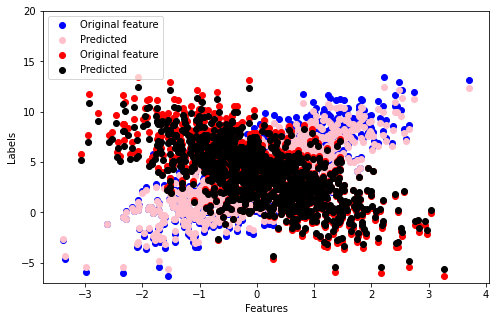

In [264]:
plt.figure(figsize=(8, 5))
plt.ylim(-7, 20)
plt.xlabel('Features')
plt.ylabel('Labels')

plt.scatter(data[:, 0], labels, c='blue', label='Original feature')
plt.scatter(data[:, 0], pred_line.detach().numpy(), c='pink', label='Predicted')
plt.scatter(data[:, 1], labels, c='red', label='Original feature')
plt.scatter(data[:, 1], pred_line.detach().numpy(), c='black', label='Predicted')
plt.legend(loc='upper left')
plt.show()

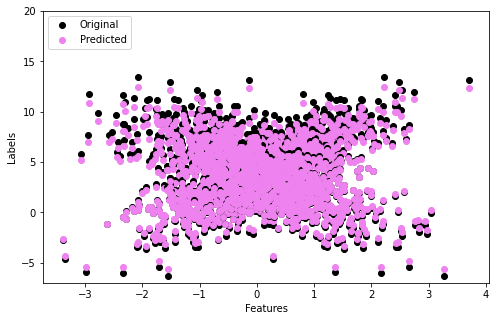

In [274]:
plt.figure(figsize=(8, 5))
plt.ylim(-7, 20)
plt.xlabel('Features')
plt.ylabel('Labels')

plt.scatter(data[:, 0], labels, c='black', label='Original')
plt.scatter(data[:, 0], pred_line.detach().numpy(), c='violet', label='Predicted')
plt.scatter(data[:, 1], labels, c='black')
plt.scatter(data[:, 1], pred_line.detach().numpy(), c='violet')
plt.legend(loc='upper left')
plt.show()